# Load Package

# Linear Regression Model

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [263]:
path = 'Reorgnized_RB.csv'
Russell_data = pd.read_csv(path)


In [264]:
for col in Russell_data.columns:
    print(col)

Team
Opponent
Min
FGM
FGA
FG%
3PM
3PA
3P%
FTM
FTA
FT%
OREB
DREB
REB
AST
STL
BLK
TOV
PF
PTS
+/-
Year
Win/Lose
Team score
Opponent score
DayOfWeek
date
Season
Game Type


In [265]:
# All of the features of interest
# selected_inputs = [
#     #"Team",
#     #"Opponent",
#     "Min",
#     "FGM",
#     "FGA",
#     "FG%",
#     "3PM",
#     "3PA",
#     "3P%",
#     "FTM",
#     "FTA",
#     "FT%",
#     "OREB",
#     "DREB",
#     "REB",
#     "AST",
#     "STL",
#     "BLK",
#     "TOV",
#     "PF",
#     #"PTS",
#     "+/-",
#     "Year",
#     #"Win/Lose",
#     "Team score",
#     #"DayOfWeek",
#     #"date",
#     "Season",
#     #"Game Type"
# ]

y = Russell_data["PTS"]
features = Russell_data.drop(columns=["PTS"])
features

,Team,Opponent,Min,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,PF,+/-,Year,Win/Lose,Team score,Opponent score,DayOfWeek,date,Season,Game Type
0,OKC,MIL,22.0,4.0,9.0,44.4,1.0,2.0,50.0,4.0,...,2.0,5.0,2008,L,87,98,Wed,2008-10-29,1,Regular
1,OKC,HOU,19.0,2.0,7.0,28.6,0.0,1.0,0.0,2.0,...,2.0,-19.0,2008,L,77,89,Sat,2008-11-01,1,Regular
2,OKC,MIN,25.0,6.0,13.0,46.2,0.0,1.0,0.0,2.0,...,1.0,7.0,2008,W,88,85,Sun,2008-11-02,1,Regular
3,OKC,BOS,19.0,4.0,13.0,30.8,3.0,5.0,60.0,2.0,...,3.0,-3.0,2008,L,83,96,Wed,2008-11-05,1,Regular
4,OKC,UTA,17.0,1.0,8.0,12.5,0.0,0.0,0.0,4.0,...,1.0,-5.0,2008,L,97,104,Fri,2008-11-07,1,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,LAC,MEM,16.0,5.0,11.0,45.5,1.0,3.0,33.3,1.0,...,1.0,0.0,2024,W,128,119,Fri,2024-01-12,16,Regular
1250,LAC,MIN,29.0,3.0,8.0,37.5,2.0,2.0,100.0,4.0,...,4.0,2.0,2024,L,105,109,Sun,2024-01-14,16,Regular
1251,LAC,OKC,22.0,4.0,8.0,50.0,0.0,3.0,0.0,3.0,...,0.0,6.0,2024,W,128,117,Tue,2024-01-16,16,Regular
1252,LAC,BKN,31.0,10.0,16.0,62.5,1.0,2.0,50.0,2.0,...,3.0,22.0,2024,W,125,114,Sun,2024-01-21,16,Regular


Split data into train, validate, and test sets

In [266]:
from sklearn.model_selection import train_test_split


train_data, val_and_test_data = train_test_split(Russell_data, test_size=0.3)
val_data, test_data = train_test_split(val_and_test_data, test_size=0.5)

Plot the relatinship between points and minutes play

Text(0, 0.5, 'PTS')

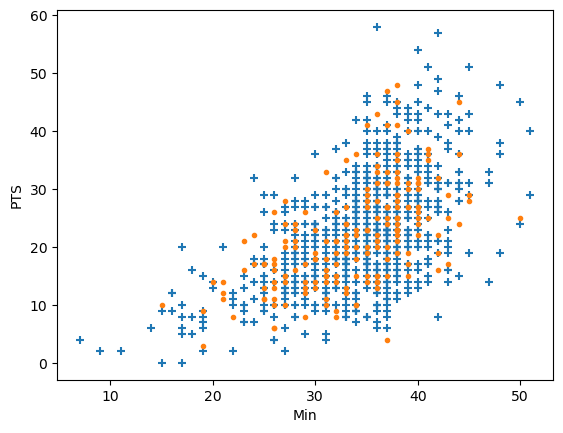

In [267]:
plt.scatter(train_data["Min"], train_data["PTS"], marker="+", label="Train")
plt.scatter(val_data["Min"], val_data["PTS"], marker=".", label="Validate")

plt.xlabel("Min")
plt.ylabel("PTS")

Decide basic feature

In [268]:
basic_featrue = ["Min","AST","STL","BLK",'FG%', '+/-']

advanced_feature = [
    #"Team",
    #"Opponent",
    "Min",
    "FGM",
    "FGA",
    "FG%",
    "3PM",
    "3PA",
    "3P%",
    "FTM",
    "FTA",
    "FT%",
    "OREB",
    "DREB",
    "REB",
    "AST",
    "STL",
    "BLK",
    "TOV",
    "PF",
    "+/-",
    #"Year",
    #"Win/Lose",
    "Team score",
    #"DayOfWeek",
    #"date",
    "Season",
    #"Game Type"
]

Create linear regression model

In [269]:
from sklearn.linear_model import LinearRegression

basic_model = LinearRegression().fit(train_data[basic_featrue], train_data["PTS"])
advanced_model = LinearRegression().fit(train_data[advanced_feature], train_data['PTS'])


# Calculate RMSE 

RMSE= sqrt(MSE)


Train dataset

In [270]:
from sklearn.metrics import mean_squared_error

basic_pred_train = basic_model.predict(train_data[basic_featrue])
basic_rmse_train = np.sqrt(mean_squared_error(train_data["PTS"],basic_pred_train))

advanced_pred_train = advanced_model.predict(train_data[advanced_feature])
advanced_rmse_train = np.sqrt(mean_squared_error(train_data["PTS"], advanced_pred_train))


Validate dataset

In [271]:
basic_pred_val = basic_model.predict(val_data[basic_featrue])
basic_rmse_val = np.sqrt(mean_squared_error(val_data["PTS"], basic_pred_val))

advanced_pred_val = advanced_model.predict(val_data[advanced_feature])
advanced_rmse_val = np.sqrt(mean_squared_error(val_data['PTS'], advanced_pred_val))

Test dataset

In [272]:
basic_pred_test = basic_model.predict(test_data[basic_featrue])
basic_rmse_test = np.sqrt(mean_squared_error(test_data["PTS"], basic_pred_test))

advanced_pred_test = advanced_model.predict(test_data[advanced_feature])
advanced_rmse_test = np.sqrt(mean_squared_error(test_data['PTS'], advanced_pred_test))

In [283]:
print(advanced_rmse_train, advanced_rmse_val, advanced_rmse_test)

print(basic_rmse_train,basic_rmse_val, basic_rmse_test)


5.845408665486448e-14 6.058875960931316e-14 5.884299734921797e-14
6.313961493208715 6.208253969328182 6.606686195630309


In [280]:
mean = np.mean(train_data["PTS"])
std_dev = np.std(train_data["PTS"])
print(mean, std_dev)

22.39794754846066 9.232590402914559
